In [1]:
#import dependencies
import csv
import matplotlib.pyplot as plt
import pandas as pd
import gmaps
# Import API key
from api_keys import g_key
import numpy as np

In [2]:
#read in all zipcode csvs
Csvpath1 = "30312_weather_traffic_FINAL.csv"
Csvpath2 = "30339_weather_traffic_FINAL.csv"
Csvpath3 = "30331_weather_traffic_FINAL.csv"
Csvpath4 = "30315_weather_traffic_FINAL.csv"
Csvpath5 = "30309_weather_traffic_FINAL.csv"
Csvpath6 = "30340_weather_traffic_FINAL.csv"
Csvpath7 = "30308_weather_traffic_FINAL.csv"
Csvpath8 = "30324_weather_traffic_FINAL.csv"
Csvpath9 = "30342_weather_traffic_FINAL.csv"
Csvpath10 ="30318_weather_traffic_FINAL.csv"

zip_30312_df = pd.read_csv(Csvpath1)
zip_30339_df = pd.read_csv(Csvpath2)
zip_30331_df = pd.read_csv(Csvpath3)
zip_30315_df = pd.read_csv(Csvpath4)
zip_30309_df = pd.read_csv(Csvpath5)
zip_30340_df = pd.read_csv(Csvpath6)
zip_30308_df = pd.read_csv(Csvpath7)
zip_30324_df = pd.read_csv(Csvpath8)
zip_30342_df = pd.read_csv(Csvpath9)
zip_30318_df = pd.read_csv(Csvpath10)

In [3]:
zip_30312_df_reduced = zip_30312_df.loc[(zip_30312_df["Precipitation"]>0),:]
zip_30312_df_reduced

,Unnamed: 0,Location,Address,Country,Date,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,...,Relative Humidity,Conditions,Severity_1,Severity_2,Severity_3,Severity_4,Residential_ct,Interstate_ct,Accident_ct,Zipcode
0,0,NaN,30312,USA,01/01/2019,65.1,56.4,61.5,NaN,NaN,...,90.30,"Rain, Partially cloudy",0,0,2,0,1,1,2,30312
1,1,NaN,30312,USA,01/02/2019,57.0,49.0,52.4,46.3,NaN,...,91.80,"Rain, Overcast",0,0,1,0,0,1,1,30312
2,2,NaN,30312,USA,01/03/2019,54.3,50.1,52.5,NaN,NaN,...,95.95,"Rain, Overcast",0,2,2,0,1,3,4,30312
3,3,NaN,30312,USA,01/04/2019,64.8,45.1,54.5,40.1,NaN,...,86.19,"Rain, Overcast",0,0,4,0,3,1,4,30312
11,11,NaN,30312,USA,01/12/2019,42.8,37.2,40.7,29.3,NaN,...,60.15,"Rain, Overcast",0,0,3,0,1,2,3,30312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,718,NaN,30312,Atlanta,12/20/2018,51.1,45.7,48.5,40.0,NaN,...,91.22,"Rain, Overcast",0,0,0,3,2,1,3,30312
719,719,NaN,30312,Atlanta,12/21/2018,50.2,39.5,45.3,31.5,NaN,...,89.58,"Rain, Overcast",0,3,0,0,2,1,3,30312
725,725,NaN,30312,Atlanta,12/27/2018,52.9,46.6,49.1,41.0,NaN,...,71.41,"Rain, Overcast",0,0,0,0,0,0,0,30312
726,726,NaN,30312,Atlanta,12/28/2018,62.0,49.7,55.5,45.3,NaN,...,96.22,"Rain, Overcast",0,2,4,0,2,4,6,30312


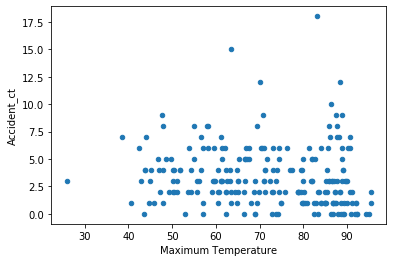

In [4]:
zip_30312_df_reduced.plot.scatter('Maximum Temperature', 'Accident_ct')

Text(0, 0.5, 'Sum of accidents')

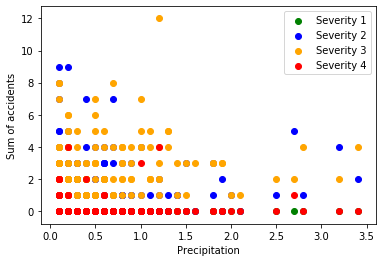

In [5]:
x = zip_30312_df_reduced["Precipitation"]
y1 = zip_30312_df_reduced["Severity_1"]
y2 = zip_30312_df_reduced["Severity_2"]
y3 = zip_30312_df_reduced["Severity_3"]
y4 = zip_30312_df_reduced["Severity_4"]
plt.scatter(x,y1,color='green', label = "Severity 1")
plt.scatter(x,y2,color='blue',label = "Severity 2")
plt.scatter(x,y3,color='orange',label = "Severity 3")
plt.scatter(x,y4,color='red',label = "Severity 4")
plt.legend(loc = 'upper right')
plt.xlabel("Precipitation")
plt.ylabel("Sum of accidents")

In [6]:
zip_30312_df_reduced_hum = zip_30312_df.loc[zip_30312_df["Relative Humidity"]>75,:]

Text(0, 0.5, 'Sum of accidents')

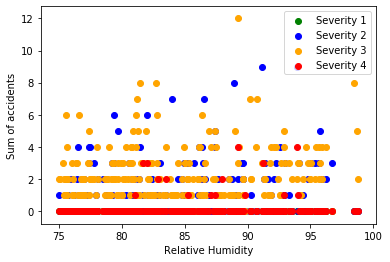

In [7]:
x_hum = zip_30312_df_reduced_hum["Relative Humidity"]
y1_hum = zip_30312_df_reduced_hum["Severity_1"]
y2_hum = zip_30312_df_reduced_hum["Severity_2"]
y3_hum = zip_30312_df_reduced_hum["Severity_3"]
y4_hum = zip_30312_df_reduced_hum["Severity_4"]
plt.scatter(x_hum,y1_hum,color='green', label = "Severity 1")
plt.scatter(x_hum,y2_hum,color='blue',label = "Severity 2")
plt.scatter(x_hum,y3_hum,color='orange',label = "Severity 3")
plt.scatter(x_hum,y4_hum,color='red',label = "Severity 4")
plt.legend(loc = 'upper right')
plt.xlabel("Relative Humidity")
plt.ylabel("Sum of accidents")

In [8]:
zip_30312_df_baseline = zip_30312_df.loc[(zip_30312_df["Precipitation"]==0),:]
zip_30312_df_baseline

,Unnamed: 0,Location,Address,Country,Date,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,...,Relative Humidity,Conditions,Severity_1,Severity_2,Severity_3,Severity_4,Residential_ct,Interstate_ct,Accident_ct,Zipcode
4,4,NaN,30312,USA,01/05/2019,57.8,43.7,48.8,36.4,NaN,...,64.92,Partially cloudy,0,0,2,0,1,1,2,30312
5,5,NaN,30312,USA,01/06/2019,68.5,41.6,52.8,38.2,NaN,...,62.19,Clear,0,1,2,0,2,1,3,30312
6,6,NaN,30312,USA,01/07/2019,67.9,40.8,53.3,45.1,NaN,...,67.52,Partially cloudy,0,0,0,0,0,0,0,30312
7,7,NaN,30312,USA,01/08/2019,64.5,48.9,56.1,48.1,NaN,...,77.43,Partially cloudy,0,4,1,0,3,2,5,30312
8,8,NaN,30312,USA,01/09/2019,56.1,39.3,46.7,30.3,NaN,...,41.08,Clear,0,2,2,0,1,3,4,30312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,722,NaN,30312,Atlanta,12/24/2018,52.0,33.7,42.1,27.2,NaN,...,69.80,Clear,0,0,2,0,1,1,2,30312
723,723,NaN,30312,Atlanta,12/25/2018,56.6,30.4,43.5,38.5,NaN,...,67.35,Partially cloudy,0,0,2,0,1,1,2,30312
724,724,NaN,30312,Atlanta,12/26/2018,57.9,36.6,47.1,34.2,NaN,...,69.09,Partially cloudy,0,1,1,0,1,1,2,30312
727,727,NaN,30312,Atlanta,12/29/2018,59.6,46.1,52.2,44.5,NaN,...,82.07,Partially cloudy,0,0,2,0,0,2,2,30312


In [9]:
# x1 = zip_30312_df_baseline["Accident_ct"]
# x2 = x1.fillna(0)
# x3 = zip_30312_df_reduced["Accident_ct"]
# flierprops = dict(marker='s', markerfacecolor='red', markersize=12)
# plt.boxplot ([x2,x3], labels = ['baseline','Precipitation'], flierprops = flierprops, showmeans=True)


Text(0.5, 1.0, '30312 Accident Breakdown')

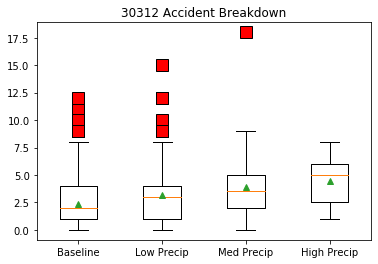

In [10]:
#30312 boxplots
zip_30312_df_reduced = zip_30312_df.loc[(zip_30312_df["Precipitation"]>0),:]
zip_30312_df_baseline = zip_30312_df.loc[(zip_30312_df["Precipitation"]==0),:]
low_precip_30312 = zip_30312_df_reduced.loc[zip_30312_df_reduced["Precipitation"]<1,:]
med_precip_30312 = zip_30312_df_reduced.loc[(zip_30312_df_reduced["Precipitation"]>=1)
                                  &(zip_30312_df_reduced["Precipitation"]<2),:]
high_precip_30312 = zip_30312_df_reduced.loc[zip_30312_df_reduced["Precipitation"]>=2,:]

x1_30312 = zip_30312_df_baseline["Accident_ct"]
x2_30312 = low_precip_30312["Accident_ct"]
x3_30312 = med_precip_30312["Accident_ct"]
x4_30312 = high_precip_30312["Accident_ct"]
flierprops = dict(marker='s', markerfacecolor='red', markersize=12)
plt.boxplot ([x1_30312,x2_30312,x3_30312,x4_30312], labels = ['Baseline','Low Precip','Med Precip','High Precip'], flierprops = flierprops, showmeans=True)
plt.title("30312 Accident Breakdown")
# sum_precip = x1_30312.sum()+x2_30312.sum()+x3_30312.sum()+x4_30312.sum()
# sum_precip

Text(0.5, 1.0, '30315 Accident Breakdown')

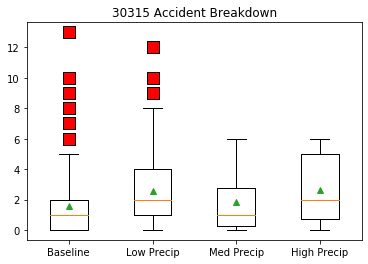

In [11]:
#30315 boxplots
zip_30315_df_reduced = zip_30315_df.loc[(zip_30315_df["Precipitation"]>0),:]
zip_30315_df_baseline = zip_30315_df.loc[(zip_30315_df["Precipitation"]==0),:]
low_precip_30315 = zip_30315_df_reduced.loc[zip_30315_df_reduced["Precipitation"]<1,:]
med_precip_30315 = zip_30315_df_reduced.loc[(zip_30315_df_reduced["Precipitation"]>=1)
                                  &(zip_30315_df_reduced["Precipitation"]<2),:]
high_precip_30315 = zip_30315_df_reduced.loc[zip_30315_df_reduced["Precipitation"]>=2,:]

x1_30315 = zip_30315_df_baseline["Accident_ct"]
x2_30315 = low_precip_30315["Accident_ct"]
x3_30315 = med_precip_30315["Accident_ct"]
x4_30315 = high_precip_30315["Accident_ct"]
flierprops = dict(marker='s', markerfacecolor='red', markersize=12)
plt.boxplot ([x1_30315,x2_30315,x3_30315,x4_30315], labels = ['Baseline','Low Precip','Med Precip','High Precip'], flierprops = flierprops, showmeans=True)
plt.title("30315 Accident Breakdown")


Text(0.5, 1.0, '30339 Accident Breakdown')

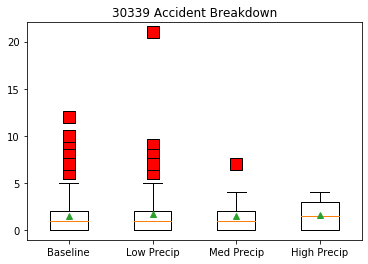

In [12]:
#30339 boxplots
zip_30339_df_reduced = zip_30339_df.loc[(zip_30339_df["Precipitation"]>0),:]
zip_30339_df_baseline = zip_30339_df.loc[(zip_30339_df["Precipitation"]==0),:]
low_precip_30339 = zip_30339_df_reduced.loc[zip_30339_df_reduced["Precipitation"]<1,:]
med_precip_30339 = zip_30339_df_reduced.loc[(zip_30339_df_reduced["Precipitation"]>=1)
                                  &(zip_30339_df_reduced["Precipitation"]<2),:]
high_precip_30339 = zip_30339_df_reduced.loc[zip_30339_df_reduced["Precipitation"]>=2,:]

x1_30339 = zip_30339_df_baseline["Accident_ct"]
x2_30339 = low_precip_30339["Accident_ct"]
x3_30339 = med_precip_30339["Accident_ct"]
x4_30339 = high_precip_30339["Accident_ct"]
flierprops = dict(marker='s', markerfacecolor='red', markersize=12)
plt.boxplot ([x1_30339,x2_30339,x3_30339,x4_30339], labels = ['Baseline','Low Precip','Med Precip','High Precip'], flierprops = flierprops, showmeans=True)
plt.title("30339 Accident Breakdown")


Text(0.5, 1.0, '30331 Accident Breakdown')

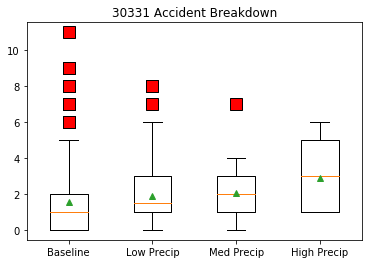

In [13]:
#30331 boxplots
zip_30331_df_reduced = zip_30331_df.loc[(zip_30331_df["Precipitation"]>0),:]
zip_30331_df_baseline = zip_30331_df.loc[(zip_30331_df["Precipitation"]==0),:]
low_precip_30331 = zip_30331_df_reduced.loc[zip_30331_df_reduced["Precipitation"]<1,:]
med_precip_30331 = zip_30331_df_reduced.loc[(zip_30331_df_reduced["Precipitation"]>=1)
                                  &(zip_30331_df_reduced["Precipitation"]<2),:]
high_precip_30331 = zip_30331_df_reduced.loc[zip_30331_df_reduced["Precipitation"]>=2,:]

x1_30331 = zip_30331_df_baseline["Accident_ct"]
x2_30331 = low_precip_30331["Accident_ct"]
x3_30331 = med_precip_30331["Accident_ct"]
x4_30331 = high_precip_30331["Accident_ct"]
flierprops = dict(marker='s', markerfacecolor='red', markersize=12)
plt.boxplot ([x1_30331,x2_30331,x3_30331,x4_30331], labels = ['Baseline','Low Precip','Med Precip','High Precip'], flierprops = flierprops, showmeans=True)
plt.title("30331 Accident Breakdown")


Text(0.5, 1.0, '30309 Accident Breakdown')

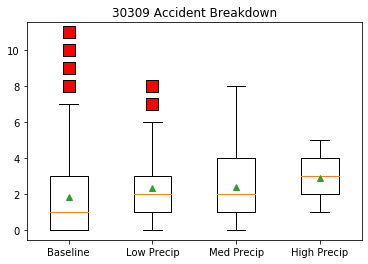

In [14]:
#30309 boxplots
zip_30309_df_reduced = zip_30309_df.loc[(zip_30309_df["Precipitation"]>0),:]
zip_30309_df_baseline = zip_30309_df.loc[(zip_30309_df["Precipitation"]==0),:]
low_precip_30309 = zip_30309_df_reduced.loc[zip_30309_df_reduced["Precipitation"]<1,:]
med_precip_30309 = zip_30309_df_reduced.loc[(zip_30309_df_reduced["Precipitation"]>=1)
                                  &(zip_30309_df_reduced["Precipitation"]<2),:]
high_precip_30309 = zip_30309_df_reduced.loc[zip_30309_df_reduced["Precipitation"]>=2,:]

x1_30309 = zip_30309_df_baseline["Accident_ct"]
x2_30309 = low_precip_30309["Accident_ct"]
x3_30309 = med_precip_30309["Accident_ct"]
x4_30309 = high_precip_30309["Accident_ct"]
flierprops = dict(marker='s', markerfacecolor='red', markersize=12)
plt.boxplot ([x1_30309,x2_30309,x3_30309,x4_30309], labels = ['Baseline','Low Precip','Med Precip','High Precip'], flierprops = flierprops, showmeans=True)
plt.title("30309 Accident Breakdown")


Text(0.5, 1.0, '30340 Accident Breakdown')

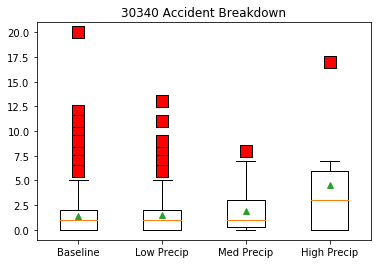

In [15]:
#30340 boxplots
zip_30340_df_reduced = zip_30340_df.loc[(zip_30340_df["Precipitation"]>0),:]
zip_30340_df_baseline = zip_30340_df.loc[(zip_30340_df["Precipitation"]==0),:]
low_precip_30340 = zip_30340_df_reduced.loc[zip_30340_df_reduced["Precipitation"]<1,:]
med_precip_30340 = zip_30340_df_reduced.loc[(zip_30340_df_reduced["Precipitation"]>=1)
                                  &(zip_30340_df_reduced["Precipitation"]<2),:]
high_precip_30340 = zip_30340_df_reduced.loc[zip_30340_df_reduced["Precipitation"]>=2,:]

x1_30340 = zip_30340_df_baseline["Accident_ct"]
x2_30340 = low_precip_30340["Accident_ct"]
x3_30340 = med_precip_30340["Accident_ct"]
x4_30340 = high_precip_30340["Accident_ct"]
flierprops = dict(marker='s', markerfacecolor='red', markersize=12)
plt.boxplot ([x1_30340,x2_30340,x3_30340,x4_30340], labels = ['Baseline','Low Precip','Med Precip','High Precip'], flierprops = flierprops, showmeans=True)
plt.title("30340 Accident Breakdown")


Text(0.5, 1.0, '30308 Accident Breakdown')

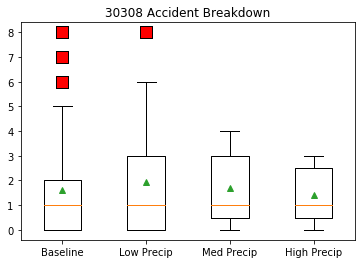

In [16]:
#30308 boxplots
zip_30308_df_reduced = zip_30308_df.loc[(zip_30308_df["Precipitation"]>0),:]
zip_30308_df_baseline = zip_30308_df.loc[(zip_30308_df["Precipitation"]==0),:]
low_precip_30308 = zip_30308_df_reduced.loc[zip_30308_df_reduced["Precipitation"]<1,:]
med_precip_30308 = zip_30308_df_reduced.loc[(zip_30308_df_reduced["Precipitation"]>=1)
                                  &(zip_30308_df_reduced["Precipitation"]<2),:]
high_precip_30308 = zip_30308_df_reduced.loc[zip_30308_df_reduced["Precipitation"]>=2,:]

x1_30308 = zip_30308_df_baseline["Accident_ct"]
x2_30308 = low_precip_30308["Accident_ct"]
x3_30308 = med_precip_30308["Accident_ct"]
x4_30308 = high_precip_30308["Accident_ct"]
flierprops = dict(marker='s', markerfacecolor='red', markersize=12)
plt.boxplot ([x1_30308,x2_30308,x3_30308,x4_30308], labels = ['Baseline','Low Precip','Med Precip','High Precip'], flierprops = flierprops, showmeans=True)
plt.title("30308 Accident Breakdown")


Text(0.5, 1.0, '30324 Accident Breakdown')

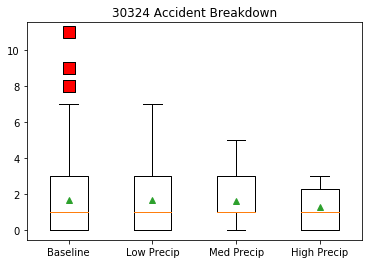

In [17]:
#30324 boxplots
zip_30324_df_reduced = zip_30324_df.loc[(zip_30324_df["Precipitation"]>0),:]
zip_30324_df_baseline = zip_30324_df.loc[(zip_30324_df["Precipitation"]==0),:]
low_precip_30324 = zip_30324_df_reduced.loc[zip_30324_df_reduced["Precipitation"]<1,:]
med_precip_30324 = zip_30324_df_reduced.loc[(zip_30324_df_reduced["Precipitation"]>=1)
                                  &(zip_30324_df_reduced["Precipitation"]<2),:]
high_precip_30324 = zip_30324_df_reduced.loc[zip_30324_df_reduced["Precipitation"]>=2,:]

x1_30324 = zip_30324_df_baseline["Accident_ct"]
x2_30324 = low_precip_30324["Accident_ct"]
x3_30324 = med_precip_30324["Accident_ct"]
x4_30324 = high_precip_30324["Accident_ct"]
flierprops = dict(marker='s', markerfacecolor='red', markersize=12)
plt.boxplot ([x1_30324,x2_30324,x3_30324,x4_30324], labels = ['Baseline','Low Precip','Med Precip','High Precip'], flierprops = flierprops, showmeans=True)
plt.title("30324 Accident Breakdown")


Text(0.5, 1.0, '30342 Accident Breakdown')

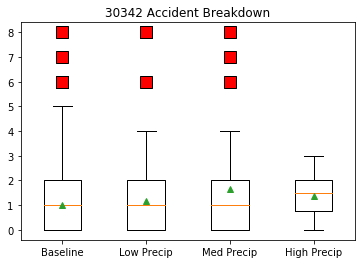

In [18]:
#30342 boxplots
zip_30342_df_reduced = zip_30342_df.loc[(zip_30342_df["Precipitation"]>0),:]
zip_30342_df_baseline = zip_30342_df.loc[(zip_30342_df["Precipitation"]==0),:]
low_precip_30342 = zip_30342_df_reduced.loc[zip_30342_df_reduced["Precipitation"]<1,:]
med_precip_30342 = zip_30342_df_reduced.loc[(zip_30342_df_reduced["Precipitation"]>=1)
                                  &(zip_30342_df_reduced["Precipitation"]<2),:]
high_precip_30342 = zip_30342_df_reduced.loc[zip_30342_df_reduced["Precipitation"]>=2,:]

x1_30342 = zip_30342_df_baseline["Accident_ct"]
x2_30342 = low_precip_30342["Accident_ct"]
x3_30342 = med_precip_30342["Accident_ct"]
x4_30342 = high_precip_30342["Accident_ct"]
flierprops = dict(marker='s', markerfacecolor='red', markersize=12)
plt.boxplot ([x1_30342,x2_30342,x3_30342,x4_30342], labels = ['Baseline','Low Precip','Med Precip','High Precip'], flierprops = flierprops, showmeans=True)
plt.title("30342 Accident Breakdown")


Text(0.5, 1.0, '30318 Accident Breakdown')

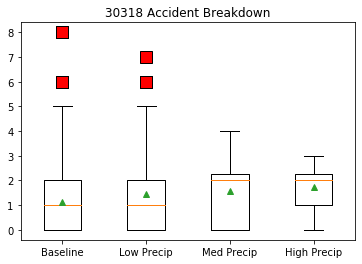

In [19]:
#30318 boxplots
zip_30318_df_reduced = zip_30318_df.loc[(zip_30318_df["Precipitation"]>0),:]
zip_30318_df_baseline = zip_30318_df.loc[(zip_30318_df["Precipitation"]==0),:]
low_precip_30318 = zip_30318_df_reduced.loc[zip_30318_df_reduced["Precipitation"]<1,:]
med_precip_30318 = zip_30318_df_reduced.loc[(zip_30318_df_reduced["Precipitation"]>=1)
                                  &(zip_30318_df_reduced["Precipitation"]<2),:]
high_precip_30318 = zip_30318_df_reduced.loc[zip_30318_df_reduced["Precipitation"]>=2,:]

x1_30318 = zip_30318_df_baseline["Accident_ct"]
x2_30318 = low_precip_30318["Accident_ct"]
x3_30318 = med_precip_30318["Accident_ct"]
x4_30318 = high_precip_30318["Accident_ct"]
flierprops = dict(marker='s', markerfacecolor='red', markersize=12)
plt.boxplot ([x1_30318,x2_30318,x3_30318,x4_30318], labels = ['Baseline','Low Precip','Med Precip','High Precip'], flierprops = flierprops, showmeans=True)
plt.title("30318 Accident Breakdown")


In [20]:
#configure gmaps
gmaps.configure(api_key=g_key)
# zipcodes = [30312, 30339, 30331, 30315, 30309, 30340, 30308, 30324, 30342, 30318]
#create list of hotel locations to use for markers
# marker_locations = [(33.746,-84.376), (33.875, -84.466), (33.716,-84.527), (33.710, -84.384), (33.794, -84.385), (33.899, -84.254),
#                    (33.772, -84.381), (33.818, -84.358), (33.879, -84.372), (33.787, -84.437)]

#source https://jupyter-gmaps.readthedocs.io/en/latest/tutorial.html
zip_dictionary =[{"Zipcode":"30312", "Location":(33.746,-84.376), "Accidents":1945, "Precip_Accidents":zip_30312_df_reduced["Accident_ct"].sum()},
                 {"Zipcode":"30339", "Location":(33.875, -84.466),"Accidents":1135, "Precip_Accidents":zip_30339_df_reduced["Accident_ct"].sum()},
                 {"Zipcode":"30331", "Location":(33.716,-84.527),"Accidents":1227, "Precip_Accidents":zip_30331_df_reduced["Accident_ct"].sum()},
                 {"Zipcode":"30315", "Location":(33.710, -84.384),"Accidents":1350, "Precip_Accidents":zip_30315_df_reduced["Accident_ct"].sum()},
                 {"Zipcode":"30309", "Location":(33.794, -84.385),"Accidents":1468, "Precip_Accidents":zip_30309_df_reduced["Accident_ct"].sum()},
                 {"Zipcode":"30340", "Location":(33.899, -84.254),"Accidents":1090, "Precip_Accidents":zip_30340_df_reduced["Accident_ct"].sum()},
                 {"Zipcode":"30308", "Location":(33.772, -84.381),"Accidents":1247, "Precip_Accidents":zip_30308_df_reduced["Accident_ct"].sum()},
                 {"Zipcode":"30324", "Location":(33.818, -84.358),"Accidents":1214, "Precip_Accidents":zip_30324_df_reduced["Accident_ct"].sum()},
                 {"Zipcode":"30342", "Location":(33.879, -84.372),"Accidents":794, "Precip_Accidents":zip_30342_df_reduced["Accident_ct"].sum()},
                 {"Zipcode":"30318", "Location":(33.787, -84.437),"Accidents":907, "Precip_Accidents":zip_30318_df_reduced["Accident_ct"].sum()}]

#looping through each zipcode coordinates
zip_locations = [zip["Location"] for zip in zip_dictionary]

#setting up info box template
info_box_template = """
<dl>
<dt>Zipcode</dt><dd>{Zipcode}</dd>
</dl>
"""

zip_info = [info_box_template.format(**zip) for zip in zip_dictionary]
fig = gmaps.figure()
#create marker layer
markers = gmaps.marker_layer(zip_locations, info_box_content=zip_info)

# Add marker layer ontop of heat map
fig.add_layer(markers)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [22]:

#set up needed inputs for heat layer from dataframe
locations = zip_locations

#source https://jupyter-gmaps.readthedocs.io/en/latest/tutorial.html
weight = [zip["Accidents"] for zip in zip_dictionary]
# weight = [1945, 1135, 1227, 1350, 1468, 1090, 1247, 1214, 794, 907]

 # Plot figure
fig2 = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=weight, 
                                 dissipating=False, max_intensity=1945,
                                 point_radius=.025)
# Add heat layer
fig2.add_layer(heat_layer)
# fig.add_layer(markers)

# Display figure
fig2


Figure(layout=FigureLayout(height='420px'))

In [21]:

#set up needed inputs for heat layer from dataframe
locations = zip_locations


#source https://jupyter-gmaps.readthedocs.io/en/latest/tutorial.html
weight2 = [zip["Precip_Accidents"] for zip in zip_dictionary]
# weight = [1945, 1135, 1227, 1350, 1468, 1090, 1247, 1214, 794, 907]

 # Plot figure
fig3 = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=weight2, 
                                 dissipating=False, max_intensity=763,
                                 point_radius=.025)
# Add heat layer
fig3.add_layer(heat_layer)
# fig.add_layer(markers)

# Display figure
fig3


Figure(layout=FigureLayout(height='420px'))

In [ ]:
#Interstate vs Residential Rds
# zipcodes = [30312, 30339, 30331, 30315, 30309, 30340, 30308, 30324, 30342, 30318]
#30312
y_30312_I = zip_30312_df_reduced["Interstate_ct"].sum()
y_30312_R = zip_30312_df_reduced["Residential_ct"].sum()
y_30312_I_m = zip_30312_df_reduced["Interstate_ct"].mean()
y_30312_R_m = zip_30312_df_reduced["Residential_ct"].mean()

#30339
y_30339_I = zip_30339_df_reduced["Interstate_ct"].sum()
y_30339_R = zip_30339_df_reduced["Residential_ct"].sum()
y_30339_I_m = zip_30339_df_reduced["Interstate_ct"].mean()
y_30339_R_m = zip_30339_df_reduced["Residential_ct"].mean()
#30331
y_30331_I = zip_30331_df_reduced["Interstate_ct"].sum()
y_30331_R = zip_30331_df_reduced["Residential_ct"].sum()
y_30331_I_m = zip_30331_df_reduced["Interstate_ct"].mean()
y_30331_R_m = zip_30331_df_reduced["Residential_ct"].mean()
#30315
y_30315_I = zip_30315_df_reduced["Interstate_ct"].sum()
y_30315_R = zip_30315_df_reduced["Residential_ct"].sum()
y_30315_I_m = zip_30315_df_reduced["Interstate_ct"].mean()
y_30315_R_m = zip_30315_df_reduced["Residential_ct"].mean()
#30309
y_30309_I = zip_30309_df_reduced["Interstate_ct"].sum()
y_30309_R = zip_30309_df_reduced["Residential_ct"].sum()
y_30309_I_m = zip_30309_df_reduced["Interstate_ct"].mean()
y_30309_R_m = zip_30309_df_reduced["Residential_ct"].mean()
#30340
y_30340_I = zip_30340_df_reduced["Interstate_ct"].sum()
y_30340_R = zip_30340_df_reduced["Residential_ct"].sum()
y_30340_I_m = zip_30340_df_reduced["Interstate_ct"].mean()
y_30340_R_m = zip_30340_df_reduced["Residential_ct"].mean()
#30308
y_30308_I = zip_30308_df_reduced["Interstate_ct"].sum()
y_30308_R = zip_30308_df_reduced["Residential_ct"].sum()
y_30308_I_m = zip_30308_df_reduced["Interstate_ct"].mean()
y_30308_R_m = zip_30308_df_reduced["Residential_ct"].mean()
#30324
y_30324_I = zip_30324_df_reduced["Interstate_ct"].sum()
y_30324_R = zip_30324_df_reduced["Residential_ct"].sum()
y_30324_I_m = zip_30324_df_reduced["Interstate_ct"].mean()
y_30324_R_m = zip_30324_df_reduced["Residential_ct"].mean()
#30342
y_30342_I = zip_30342_df_reduced["Interstate_ct"].sum()
y_30342_R = zip_30342_df_reduced["Residential_ct"].sum()
y_30342_I_m = zip_30342_df_reduced["Interstate_ct"].mean()
y_30342_R_m = zip_30342_df_reduced["Residential_ct"].mean()
#30318
y_30318_I = zip_30318_df_reduced["Interstate_ct"].sum()
y_30318_R = zip_30318_df_reduced["Residential_ct"].sum()
y_30318_I_m = zip_30318_df_reduced["Interstate_ct"].mean()
y_30318_R_m = zip_30318_df_reduced["Residential_ct"].mean()


In [ ]:

# Plotting Bar Plot 
plt.bar("30312",y_30312_I, color = 'r',label = "Interstate") 
plt.bar("30312",y_30312_R, color = 'b', label = "Residential") 

plt.bar("30339",y_30339_I, color = 'r') 
plt.bar("30339",y_30339_R, color = 'b') 
 
plt.bar("30331",y_30331_I, color = 'r') 
plt.bar("30331",y_30331_R, color = 'b') 

plt.bar("30315",y_30315_I, color = 'r') 
plt.bar("30315",y_30315_R, color = 'b') 
 
plt.bar("30309",y_30309_I, color = 'r') 
plt.bar("30309",y_30309_R, color = 'b') 

plt.bar("30340",y_30340_I, color = 'r') 
plt.bar("30340",y_30340_R, color = 'b') 


plt.bar("30308",y_30308_I, color = 'r') 
plt.bar("30308",y_30308_R, color = 'b')

plt.bar("30324",y_30324_I, color = 'r') 
plt.bar("30324",y_30324_R, color = 'b')

plt.bar("30342",y_30342_I, color = 'r') 
plt.bar("30342",y_30342_R, color = 'b')

plt.bar("30318",y_30318_I, color = 'r') 
plt.bar("30318",y_30318_R, color = 'b')

plt.legend(loc = "upper right")
figsize = (30, 10)
plt.xticks(rotation='vertical')
# Show Plot 
plt.tight_layout()



In [ ]:
#Interstate vs Residential Rds
# zipcodes = [30312, 30339, 30331, 30315, 30309, 30340, 30308, 30324, 30342, 30318]
#30312
y_30312_I_base = zip_30312_df_baseline["Interstate_ct"].sum()
y_30312_R_base = zip_30312_df_baseline["Residential_ct"].sum()
y_30312_I_base_m = zip_30312_df_baseline["Interstate_ct"].mean()
y_30312_R_base_m = zip_30312_df_baseline["Residential_ct"].mean()
#30339
y_30339_I_base = zip_30339_df_baseline["Interstate_ct"].sum()
y_30339_R_base = zip_30339_df_baseline["Residential_ct"].sum()
y_30339_I_base_m = zip_30339_df_baseline["Interstate_ct"].mean()
y_30339_R_base_m = zip_30339_df_baseline["Residential_ct"].mean()
#30331
y_30331_I_base = zip_30331_df_baseline["Interstate_ct"].sum()
y_30331_R_base = zip_30331_df_baseline["Residential_ct"].sum()
y_30331_I_base_m = zip_30331_df_baseline["Interstate_ct"].mean()
y_30331_R_base_m = zip_30331_df_baseline["Residential_ct"].mean()
#30315
y_30315_I_base = zip_30315_df_baseline["Interstate_ct"].sum()
y_30315_R_base = zip_30315_df_baseline["Residential_ct"].sum()
y_30315_I_base_m = zip_30315_df_baseline["Interstate_ct"].mean()
y_30315_R_base_m = zip_30315_df_baseline["Residential_ct"].mean()
#30309
y_30309_I_base = zip_30309_df_baseline["Interstate_ct"].sum()
y_30309_R_base = zip_30309_df_baseline["Residential_ct"].sum()
y_30309_I_base_m = zip_30309_df_baseline["Interstate_ct"].mean()
y_30309_R_base_m = zip_30309_df_baseline["Residential_ct"].mean()
#30340
y_30340_I_base = zip_30340_df_baseline["Interstate_ct"].sum()
y_30340_R_base = zip_30340_df_baseline["Residential_ct"].sum()
y_30340_I_base_m = zip_30340_df_baseline["Interstate_ct"].mean()
y_30340_R_base_m = zip_30340_df_baseline["Residential_ct"].mean()
#30308
y_30308_I_base = zip_30308_df_baseline["Interstate_ct"].sum()
y_30308_R_base = zip_30308_df_baseline["Residential_ct"].sum()
y_30308_I_base_m = zip_30308_df_baseline["Interstate_ct"].mean()
y_30308_R_base_m = zip_30308_df_baseline["Residential_ct"].mean()
#30324
y_30324_I_base = zip_30324_df_baseline["Interstate_ct"].sum()
y_30324_R_base = zip_30324_df_baseline["Residential_ct"].sum()
y_30324_I_base_m = zip_30324_df_baseline["Interstate_ct"].mean()
y_30324_R_base_m = zip_30324_df_baseline["Residential_ct"].mean()
#30342
y_30342_I_base = zip_30342_df_baseline["Interstate_ct"].sum()
y_30342_R_base = zip_30342_df_baseline["Residential_ct"].sum()
y_30342_I_base_m = zip_30342_df_baseline["Interstate_ct"].mean()
y_30342_R_base_m = zip_30342_df_baseline["Residential_ct"].mean()
#30318
y_30318_I_base = zip_30318_df_baseline["Interstate_ct"].sum()
y_30318_R_base = zip_30318_df_baseline["Residential_ct"].sum()
y_30318_I_base_m = zip_30318_df_baseline["Interstate_ct"].mean()
y_30318_R_base_m = zip_30318_df_baseline["Residential_ct"].mean()


In [ ]:

#source: https://learndataanalysis.org/graph-a-grouped-bar-chart-matplotlib-tutorial/
zipcodes = [30312, 30339, 30331, 30315, 30309, 30340, 30308, 30324, 30342, 30318]
indx = np.arange(len(zipcodes))
I_counts_precip = [y_30312_I,y_30339_I,y_30331_I,y_30315_I,y_30309_I,y_30340_I,y_30308_I,y_30324_I,y_30342_I,y_30318_I]
I_counts_no_precip = [y_30312_I_base,y_30339_I_base,y_30331_I_base,y_30315_I_base,y_30309_I_base,y_30340_I_base,y_30308_I_base,y_30324_I_base,y_30342_I_base,y_30318_I_base]
bar_width = 0.35

fig, ax = plt.subplots()
inter_precip = ax.bar(indx - bar_width/2, I_counts_precip, bar_width, label='With precip')
inter_no_precip = ax.bar(indx + bar_width/2, I_counts_no_precip, bar_width, label='No precip')
plt.title("Interstate Accidents: With and Without Precipitation")
plt.legend(loc="upper right")
plt.xlabel("Zipcode")
plt.ylabel("Number of Accidents")
tick_locations = indx
plt.xticks(tick_locations, zipcodes, rotation = 'vertical')


In [ ]:
zipcodes = [30312, 30339, 30331, 30315, 30309, 30340, 30308, 30324, 30342, 30318]
indx = np.arange(len(zipcodes))
Accident_counts_interstate = [y_30312_I,y_30339_I,y_30331_I,y_30315_I,y_30309_I,y_30340_I,y_30308_I,y_30324_I,y_30342_I,y_30318_I]
Accident_counts_residential = [y_30312_R,y_30339_R,y_30331_R,y_30315_R,y_30309_R,y_30340_R,y_30308_R,y_30324_R,y_30342_R,y_30318_R]
bar_width = 0.35

fig, ax = plt.subplots()
inter_precip = ax.bar(indx - bar_width/2, Accident_counts_interstate, bar_width, label='Interstate')
inter_no_precip = ax.bar(indx + bar_width/2, Accident_counts_residential, bar_width, label='Residential')
plt.title("With Precipitation: Accidents on Interstate vs Residential")
plt.legend(loc="upper right")
plt.xlabel("Zipcode")
plt.ylabel("Number of Accidents")
tick_locations = indx
plt.xticks(tick_locations, zipcodes, rotation = 'vertical')


In [ ]:

#source: https://learndataanalysis.org/graph-a-grouped-bar-chart-matplotlib-tutorial/
zipcodes = [30312, 30339, 30331, 30315, 30309, 30340, 30308, 30324, 30342, 30318]
indx = np.arange(len(zipcodes))
R_counts_no_precip = [y_30312_R_base,y_30339_R_base,y_30331_R_base,y_30315_R_base,y_30309_R_base,y_30340_R_base,y_30308_R_base,y_30324_R_base,y_30342_R_base,y_30318_R_base]
I_counts_no_precip = [y_30312_I_base,y_30339_I_base,y_30331_I_base,y_30315_I_base,y_30309_I_base,y_30340_I_base,y_30308_I_base,y_30324_I_base,y_30342_I_base,y_30318_I_base]
bar_width = 0.35

fig, ax = plt.subplots()
inter_precip = ax.bar(indx - bar_width/2, I_counts_no_precip, bar_width, label='Interstate')
inter_no_precip = ax.bar(indx + bar_width/2, R_counts_no_precip, bar_width, label='Residential')
plt.title("No Precipitation: Accidents on Interstate vs Residential")
plt.legend(loc="upper right")
plt.xlabel("Zipcode")
plt.ylabel("Number of Accidents")
tick_locations = indx
plt.xticks(tick_locations, zipcodes, rotation = 'vertical')


In [ ]:
zipcodes = [30312, 30339, 30331, 30315, 30309, 30340, 30308, 30324, 30342, 30318]
indx = np.arange(len(zipcodes))
Accident_counts_interstate = [y_30312_I_m,y_30339_I_m,y_30331_I_m,y_30315_I_m,y_30309_I_m,y_30340_I_m,y_30308_I_m,y_30324_I_m,y_30342_I_m,y_30318_I_m]
Accident_counts_residential = [y_30312_R_m,y_30339_R_m,y_30331_R_m,y_30315_R_m,y_30309_R_m,y_30340_R_m,y_30308_R_m,y_30324_R_m,y_30342_R_m,y_30318_R_m]
bar_width = 0.35

fig, ax = plt.subplots()
inter_precip = ax.bar(indx - bar_width/2, Accident_counts_interstate, bar_width, label='Interstate')
inter_no_precip = ax.bar(indx + bar_width/2, Accident_counts_residential, bar_width, label='Residential')
plt.title("With Precipitation: Accident Avg on Interstate vs Residential")
plt.legend(loc="upper right")
plt.xlabel("Zipcode")
plt.ylabel("Average Accidents")
tick_locations = indx
plt.xticks(tick_locations, zipcodes, rotation = 'vertical')


In [ ]:

#source: https://learndataanalysis.org/graph-a-grouped-bar-chart-matplotlib-tutorial/
zipcodes = [30312, 30339, 30331, 30315, 30309, 30340, 30308, 30324, 30342, 30318]
indx = np.arange(len(zipcodes))
R_counts_no_precip = [y_30312_R_base_m,y_30339_R_base_m,y_30331_R_base_m,y_30315_R_base_m,y_30309_R_base_m,y_30340_R_base_m,y_30308_R_base_m,y_30324_R_base_m,y_30342_R_base_m,y_30318_R_base_m]
I_counts_no_precip = [y_30312_I_base_m,y_30339_I_base_m,y_30331_I_base_m,y_30315_I_base_m,y_30309_I_base_m,y_30340_I_base_m,y_30308_I_base_m,y_30324_I_base_m,y_30342_I_base_m,y_30318_I_base_m]
bar_width = 0.35

fig, ax = plt.subplots()
inter_precip = ax.bar(indx - bar_width/2, I_counts_no_precip, bar_width, label='Interstate')
inter_no_precip = ax.bar(indx + bar_width/2, R_counts_no_precip, bar_width, label='Residential')
plt.title("No Precipitation: Accident Avg on Interstate vs Residential")
plt.legend(loc="upper right")
plt.xlabel("Zipcode")
plt.ylabel("Average Accidents")
tick_locations = indx
plt.xticks(tick_locations, zipcodes, rotation = 'vertical')


In [ ]:
zipcodes = [30312, 30339, 30331, 30315, 30309, 30340, 30308, 30324, 30342, 30318]
indx = np.arange(len(zipcodes))
Accident_counts_interstate = [y_30312_I_m,y_30339_I_m,y_30331_I_m,y_30315_I_m,y_30309_I_m,y_30340_I_m,y_30308_I_m,y_30324_I_m,y_30342_I_m,y_30318_I_m]
I_counts_no_precip = [y_30312_I_base_m,y_30339_I_base_m,y_30331_I_base_m,y_30315_I_base_m,y_30309_I_base_m,y_30340_I_base_m,y_30308_I_base_m,y_30324_I_base_m,y_30342_I_base_m,y_30318_I_base_m]
bar_width = 0.35

fig, ax = plt.subplots()
inter_precip = ax.bar(indx - bar_width/2, Accident_counts_interstate, bar_width, label='Precipitation')
inter_no_precip = ax.bar(indx + bar_width/2, I_counts_no_precip, bar_width, label='No precipitation')
plt.title("Accident Avg on Interstates")
plt.legend(loc="upper right")
plt.xlabel("Zipcode")
plt.ylabel("Average Accidents")
tick_locations = indx
plt.xticks(tick_locations, zipcodes, rotation = 'vertical')


In [ ]:
zipcodes = [30312, 30339, 30331, 30315, 30309, 30340, 30308, 30324, 30342, 30318]
indx = np.arange(len(zipcodes))
R_counts_no_precip = [y_30312_R_base_m,y_30339_R_base_m,y_30331_R_base_m,y_30315_R_base_m,y_30309_R_base_m,y_30340_R_base_m,y_30308_R_base_m,y_30324_R_base_m,y_30342_R_base_m,y_30318_R_base_m]
Accident_counts_residential = [y_30312_R_m,y_30339_R_m,y_30331_R_m,y_30315_R_m,y_30309_R_m,y_30340_R_m,y_30308_R_m,y_30324_R_m,y_30342_R_m,y_30318_R_m]

bar_width = 0.35

fig, ax = plt.subplots()
inter_precip = ax.bar(indx - bar_width/2, Accident_counts_residential, bar_width, label='Precipitation')
inter_no_precip = ax.bar(indx + bar_width/2, R_counts_no_precip, bar_width, label='No precipitation')
plt.title("Accident Avg on Residential Rds")
plt.legend(loc="upper right")
plt.xlabel("Zipcode")
plt.ylabel("Average Accidents")
tick_locations = indx
plt.xticks(tick_locations, zipcodes, rotation = 'vertical')
